In [1]:
# Only needed in pycharm
import os
os.chdir('/home/cs-folq1/src/sts_bert/sBERT')

In [2]:
train_batch_size = 16

In [3]:
from datasets import load_dataset

dataset = load_dataset("stsb_multi_mt", name="en")

Reusing dataset stsb_multi_mt (/home/cs-folq1/.cache/huggingface/datasets/stsb_multi_mt/en/1.0.0/bc6de0eaa8d97c28a4c22a07e851b05879ae62c60b0b69dd6b331339e8020f07)


In [4]:
import torch
from BiEncoder import run_experiment_biencoder
from CrossEncoder import run_experiment_crossencoder

num_rep = 3
train_sizes = [500, 1000, 1500, 2000, 3000, 4000, len(dataset['train'])]
results_biencoder = []
results_crossencoder = []

for train_size in train_sizes:
    print('SIZE {}'.format(train_size))
    results_biencoder.append([])
    results_crossencoder.append([])

    for j in range(num_rep):
        print('Rep {}'.format(j + 1))

        train_dataset_subset = torch.utils.data.Subset(dataset['train'], range(train_size))
        biencoder_result = run_experiment_biencoder(train_dataset_subset, dataset['dev'],
                                                    dataset['test'], batch_size=train_batch_size,
                                                    num_epochs=6, lr=2e-5,
                                                    disable_progress_bar=True)[1]
        print('Test score: {:.4f}'.format(biencoder_result))
        results_biencoder[-1].append(biencoder_result)
        print(results_biencoder)
        crossencoder_result = run_experiment_crossencoder(train_dataset_subset, dataset['dev'],
                                                          dataset['test'],
                                                          batch_size=train_batch_size,
                                                          num_epochs=10, lr=1e-5,
                                                          disable_progress_bar=True)[1]
        print('Test score: {:.4f}'.format(crossencoder_result))
        results_crossencoder[-1].append(crossencoder_result)
        print(results_crossencoder)

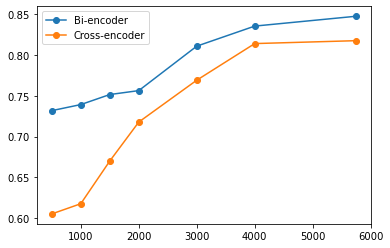

In [13]:
import matplotlib.pyplot as plt
import numpy as np

results_biencoder = [[0.7359092174646036, 0.7304051596498577, 0.729091997847081],
                     [0.7411596655888648, 0.7381974712542911, 0.738416444181848],
                     [0.7487229941402674, 0.7545618995787241, 0.7514813270965981],
                     [0.7568704139021903, 0.7541717311765502, 0.7582126082327617],
                     [0.8084285410278953, 0.8109510196293054, 0.8138105151619708],
                     [0.8347269830894014, 0.8360255965582643, 0.8364234938344148],
                     [0.8476613224106673, 0.8498278421546475, 0.8459949391554407]]

results_crossencoder = [[0.5906194602877921, 0.606579612519751, 0.6173842461729031],
                        [0.6213615467075682, 0.6181754203512072, 0.6126734241866736],
                        [0.6244608526572155, 0.6692660192643454, 0.7158840787042942],
                        [0.7267139422975412, 0.7095565086873682, 0.7170063139532679],
                        [0.7644212148015731, 0.7714862256842184, 0.7717758156421696],
                        [0.8159434119962787, 0.8111925299780551, 0.8155430978034006],
                        [0.8173710591748974, 0.818755455354884, 0.8172778545441922]]

plt.plot(train_sizes, np.array(results_biencoder).mean(1), 'o-', label='Bi-encoder')
plt.plot(train_sizes, np.array(results_crossencoder).mean(1), 'o-', label='Cross-encoder')
plt.legend()

In [ ]:
from torch.utils.data import DataLoader
from CrossEncoder import CrossEncoder, CrossEncoderTrainer

train_dataset_subset = torch.utils.data.Subset(dataset['train'], range(1000))
train_dataloader = DataLoader(train_dataset_subset, batch_size=train_batch_size, shuffle=True)

model = CrossEncoder()
trainer = CrossEncoderTrainer(model=model, train_dataset=train_dataset_subset, dataset=dataset)
trainer.train(num_epochs=10, disable_progress_bar=False)